In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Universe of discourse (x-axis range)
img_sharpness = ctrl.Antecedent(np.arange(0, 101, 1), 'img_sharpness')
paper_quality = ctrl.Antecedent(np.arange(0, 101, 1), 'paper_quality')
img_qualControl = ctrl.Consequent(np.arange(0, 101, 1), 'img_qualControl')

# Image Sharpness Fuzzy Sets
img_sharpness ['blurry'] = fuzz.trimf(img_sharpness.universe, [0, 0, 50])
img_sharpness ['slightly_blurry'] = fuzz.trimf(img_sharpness.universe, [20, 50, 80])
img_sharpness ['sharp'] = fuzz.trimf(img_sharpness.universe, [50, 100, 100])

# Color Accuracy Fuzzy Sets
paper_quality ['low'] = fuzz.trimf(paper_quality.universe, [0, 0, 40])
paper_quality ['medium'] = fuzz.trimf(paper_quality.universe, [30, 50, 70])
paper_quality ['high'] = fuzz.trimf(paper_quality.universe, [60, 100, 100])

# Color Accuracy Fuzzy Sets
img_qualControl ['draft'] = fuzz.trapmf(img_qualControl.universe, [0, 0, 15, 25])
img_qualControl ['standard'] = fuzz.trapmf(img_qualControl.universe, [20, 30, 70, 80])
img_qualControl ['high'] = fuzz.trapmf(img_qualControl.universe, [75, 85, 100, 100])

# Rules
rule1 = ctrl.Rule(img_sharpness['blurry'] & paper_quality['low'], img_qualControl['draft'])
rule2 = ctrl.Rule(img_sharpness['blurry'] & paper_quality['medium'], img_qualControl['high'])
rule3 = ctrl.Rule(img_sharpness['blurry'] & paper_quality['high'], img_qualControl['high'])
rule4 = ctrl.Rule(img_sharpness['slightly_blurry'] & paper_quality['low'], img_qualControl['draft'])
rule5 = ctrl.Rule(img_sharpness['slightly_blurry'] & paper_quality['medium'], img_qualControl['high'])
rule6 = ctrl.Rule(img_sharpness['slightly_blurry'] & paper_quality['high'], img_qualControl['high'])
rule7 = ctrl.Rule(img_sharpness['sharp'] & paper_quality['low'], img_qualControl['high'])
rule8 = ctrl.Rule(img_sharpness['sharp'] & paper_quality['medium'], img_qualControl['standard'])
rule9 = ctrl.Rule(img_sharpness['sharp'] & paper_quality['high'], img_qualControl['standard'])


# Control System and Simulation
qual_indicator = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
qualInd_sim = ctrl.ControlSystemSimulation(qual_indicator)

# Labels and title
img_sharpness.view()
plt.title('Image Sharpness Membership Functions')
plt.xlabel('Image Sharpness (%)')
plt.ylabel('Membership Value')
plt.legend()

paper_quality.view()
plt.title('Paper Quality Membership Functions')
plt.xlabel('Paper Quality (%)')
plt.ylabel('Membership Value')
plt.legend()

img_qualControl.view()
plt.title('Output Variable: Print Quality')
plt.xlabel('Image Quality (%)')
plt.ylabel('Membership Value')
plt.legend()

Enter Degree of Image Sharpness [0-100]: 79
Enter Degree ofPaper Quality [0-100]: 35
54.27398661944116


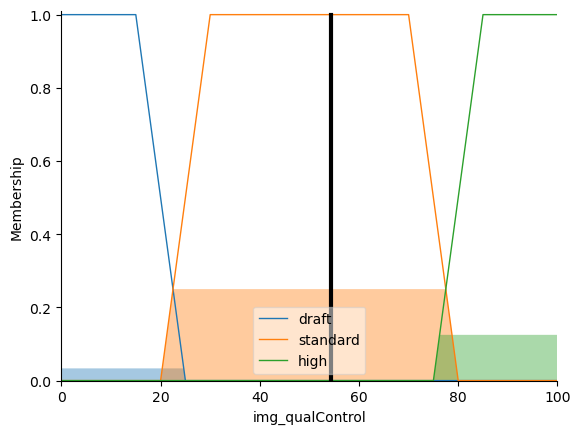

In [2]:
degOf_img_sharpness = float(input("Enter Degree of Image Sharpness [0-100]: "))
degOf_clr_accuracy = float(input("Enter Degree ofPaper Quality [0-100]: "))

# input Values
qualInd_sim.input['img_sharpness'] = degOf_img_sharpness
qualInd_sim.input['paper_quality'] = degOf_clr_accuracy

qualInd_sim.compute()

print(qualInd_sim.output['img_qualControl'])
img_qualControl.view(sim=qualInd_sim)

In [3]:
import tkinter as tk
from tkinter import Entry, Button, Label
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Function to calculate the area
def calculate():
    img_deg = float(degOf_img_sharpness.get())
    clr_deg = float(degOf_clr_accuracy.get())
    qualInd_sim.input['img_sharpness'] = img_deg
    qualInd_sim.input['paper_quality'] = clr_deg
    
    qualInd_sim.compute()
    print("Image Sharpness : " + str(img_deg))
    print("Paper Type : " + str(clr_deg))
    print(qualInd_sim.output['img_qualControl'])
    img_qualControl.view(sim=qualInd_sim)
    result_label.config(text=f"Print Quality: {qualInd_sim.output['img_qualControl']}")

# Create the main window
root = tk.Tk()
root.title("Image Print Quality Indicator")

# Labels
img_label = tk.Label(root, text="Image Sharpness: ")
clr_label = tk.Label(root, text="Paper Type: ")


# Entry fields
degOf_img_sharpness = tk.Entry(root)
degOf_clr_accuracy = tk.Entry(root)

# Button to calculate area
sim_button = tk.Button(root, text="Indicate Print Quality", command=calculate)

# Label to display result
result_label = tk.Label(root, text="Print Quality: ")


# Grid layout to organize widgets
img_label.grid(row=0, column=0, padx=10, pady=10)
degOf_img_sharpness.grid(row=0, column=1, padx=10, pady=10)
clr_label.grid(row=1, column=0, padx=10, pady=10)
degOf_clr_accuracy.grid(row=1, column=1, padx=10, pady=10)
sim_button.grid(row=2, column=0, columnspan=2, padx=10, pady=10)
result_label.grid(row=3, column=0, columnspan=2)

# Start the GUI application
root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\DELL\AppData\Local\Temp\ipykernel_5168\169471585.py", line 8, in calculate
    img_deg = float(degOf_img_sharpness.get())
ValueError: could not convert string to float: ''


In [ ]:
    for i in range(len(start) - 1):
        current_item = my_list[i]
        next_item = my_list[i + 1]